In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('broiler_dataset2025.csv')
print(df)

         tanggal kandang lokasi  umur_hari  populasi_awal  populasi_akhir  \
0     2025-11-14    K009      A         33           6763            6618   
1     2025-02-21    K062      D         35           7737            7510   
2     2025-02-23    K092      E         32           7931            7750   
3     2025-07-22    K055      C         29           3608            3522   
4     2025-05-04    K073      D         31           3146            3049   
...          ...     ...    ...        ...            ...             ...   
9995  2025-03-25    K010      A         32           6984            6842   
9996  2025-04-26    K043      C         31           5089            4947   
9997  2025-12-10    K080      D         35           3687            3583   
9998  2025-06-24    K053      C         31           4313            4200   
9999  2025-12-19    K096      E         32           7297            7119   

      mortalitas  suhu_c  kelembaban   wqi    aqi  berat_rata_kg  \
0      

In [34]:
print(df.describe())

          umur_hari  populasi_awal  populasi_akhir    mortalitas  \
count  10000.000000   10000.000000    10000.000000  10000.000000   
mean      31.517100    5500.684900     5363.679200    137.005700   
std        2.278119    1439.514608     1403.717049     39.843494   
min       28.000000    3000.000000     2916.000000     60.000000   
25%       30.000000    4249.750000     4142.000000    104.000000   
50%       32.000000    5505.000000     5367.500000    136.000000   
75%       33.000000    6739.000000     6573.250000    166.000000   
max       35.000000    7999.000000     7828.000000    254.000000   

             suhu_c    kelembaban           wqi           aqi  berat_rata_kg  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      28.978880     72.534830     78.038450     97.947770       1.714108   
std        2.639636      7.762801      9.778914     15.960909       0.252534   
min       20.500000     50.000000     44.100000     36.200000      

ANALISIS OUTLIER DATA BROILER

 OUTLIER FCR (Feed Conversion Ratio)
----------------------------------------
Q1 (25%)          : 1.74
Q3 (75%)          : 1.86
IQR                : 0.12
Batas Normal       : 1.56 - 2.04
Jumlah Outlier     : 115 dari 10000 data
Persentase Outlier : 1.15%

 5 DATA OUTLIER PERTAMA:
        tanggal kandang lokasi   fcr  suhu_c   wqi
141  2025-10-07    K075      D  2.08    30.9  79.4
148  2025-07-09    K052      C  2.05    35.4  65.9
175  2025-01-20    K045      C  2.06    33.3  73.0
186  2025-03-27    K041      C  2.05    35.4  82.5
325  2025-02-28    K041      C  2.06    33.3  85.7

Rata-rata FCR outlier : 2.04
Rata-rata FCR normal   : 1.80
Selisih                : 0.24


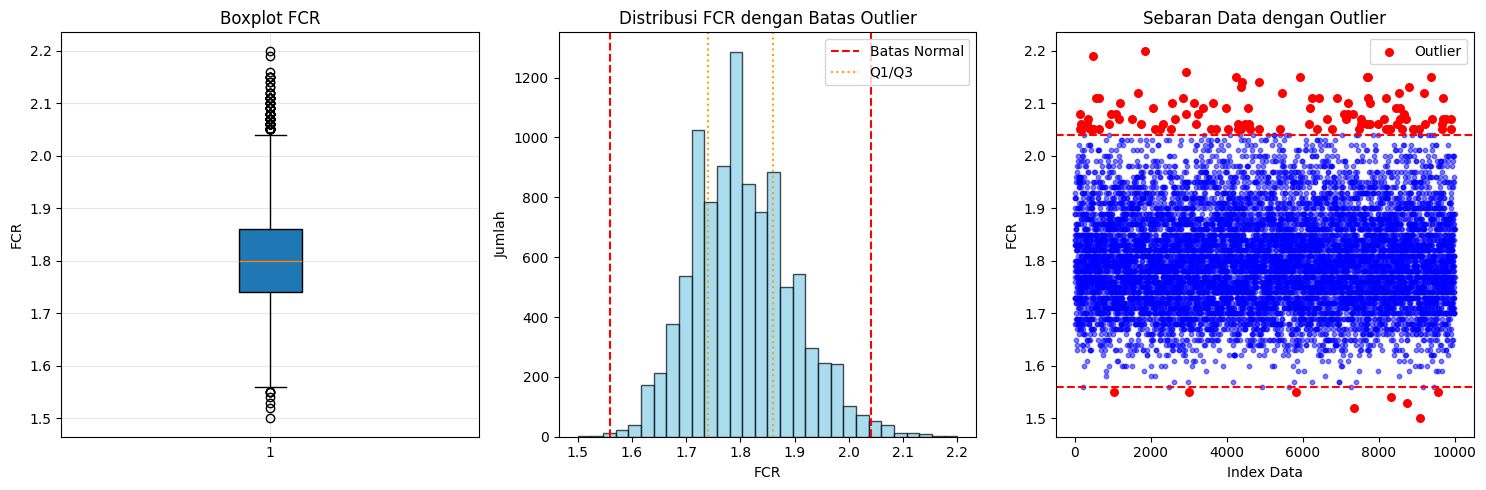

In [35]:
print("="*50)
print("ANALISIS OUTLIER DATA BROILER")
print("="*50)

def cari_outlier(data, kolom, faktor=1.5):
    
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - faktor * IQR
    batas_atas = Q3 + faktor * IQR
    outlier = data[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)]
    
    return outlier, batas_bawah, batas_atas, Q1, Q3, IQR


print("\n OUTLIER FCR (Feed Conversion Ratio)")
print("-" * 40)

outlier, bb, ba, q1, q3, iqr = cari_outlier(df, 'fcr')

print(f"Q1 (25%)          : {q1:.2f}")
print(f"Q3 (75%)          : {q3:.2f}")
print(f"IQR                : {iqr:.2f}")
print(f"Batas Normal       : {bb:.2f} - {ba:.2f}")
print(f"Jumlah Outlier     : {len(outlier)} dari {len(df)} data")
print(f"Persentase Outlier : {len(outlier)/len(df)*100:.2f}%")


if len(outlier) > 0:
    print("\n 5 DATA OUTLIER PERTAMA:")
    print(outlier[['tanggal', 'kandang', 'lokasi', 'fcr', 'suhu_c', 'wqi']].head())
    
    data_normal = df[~df.index.isin(outlier.index)]
    print(f"\nRata-rata FCR outlier : {outlier['fcr'].mean():.2f}")
    print(f"Rata-rata FCR normal   : {data_normal['fcr'].mean():.2f}")
    print(f"Selisih                : {outlier['fcr'].mean() - data_normal['fcr'].mean():.2f}")
else:
    print("\n TIDAK ADA OUTLIER!")


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
box = plt.boxplot(df['fcr'], patch_artist=True)
plt.title('Boxplot FCR')
plt.ylabel('FCR')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['fcr'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=bb, color='red', linestyle='--', label='Batas Normal')
plt.axvline(x=ba, color='red', linestyle='--')
plt.axvline(x=q1, color='orange', linestyle=':', label='Q1/Q3')
plt.axvline(x=q3, color='orange', linestyle=':')
plt.xlabel('FCR')
plt.ylabel('Jumlah')
plt.title('Distribusi FCR dengan Batas Outlier')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df['fcr'], alpha=0.5, c='blue', s=10)
plt.scatter(outlier.index, outlier['fcr'], color='red', s=30, label='Outlier')
plt.axhline(y=bb, color='red', linestyle='--')
plt.axhline(y=ba, color='red', linestyle='--')
plt.xlabel('Index Data')
plt.ylabel('FCR')
plt.title('Sebaran Data dengan Outlier')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:

efisien = df[df['fcr'] < 1.6]
sedang = df[(df['fcr'] >= 1.6) & (df['fcr'] <= 1.8)]
boros = df[df['fcr'] > 1.8]

total = len(df)

print("\n" + "="*50)
print("KATEGORI PERFORMANCE")
print("="*50)
print(f"Efisien (<1.6)  : {len(efisien)} data ({len(efisien)/total*100:.1f}%)")
print(f"Sedang (1.6-1.8): {len(sedang)} data ({len(sedang)/total*100:.1f}%)")
print(f"Boros (>1.8)    : {len(boros)} data ({len(boros)/total*100:.1f}%)")


KATEGORI PERFORMANCE
Efisien (<1.6)  : 39 data (0.4%)
Sedang (1.6-1.8): 5343 data (53.4%)
Boros (>1.8)    : 4618 data (46.2%)


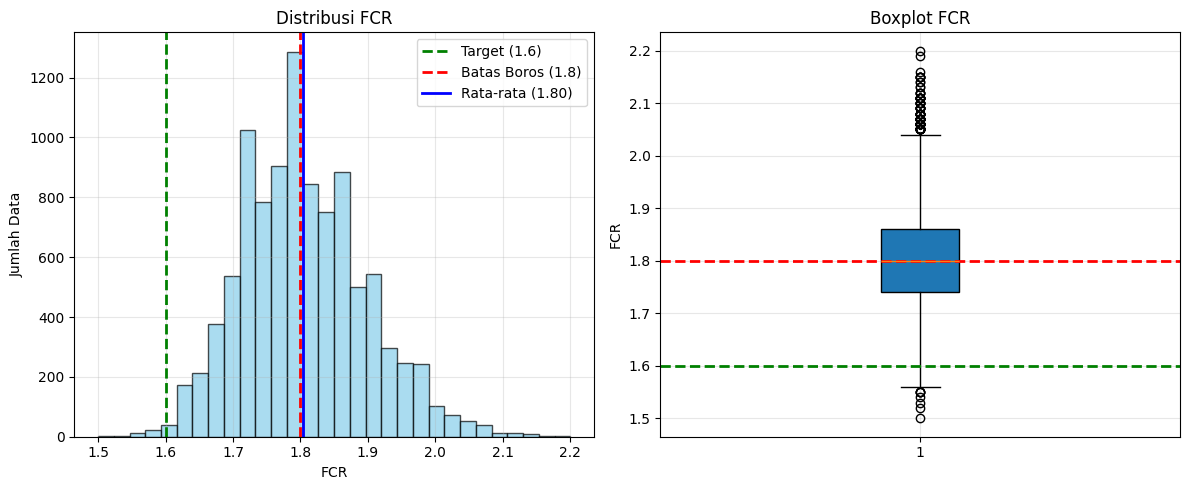

In [37]:
fcr = df['fcr']
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(fcr, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=1.6, color='green', linewidth=2, linestyle='--', label='Target (1.6)')
plt.axvline(x=1.8, color='red', linewidth=2, linestyle='--', label='Batas Boros (1.8)')
plt.axvline(x=fcr.mean(), color='blue', linewidth=2, label=f'Rata-rata ({fcr.mean():.2f})')
plt.xlabel('FCR')
plt.ylabel('Jumlah Data')
plt.title('Distribusi FCR')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
box = plt.boxplot(fcr, vert=True, patch_artist=True)
plt.axhline(y=1.6, color='green', linestyle='--', linewidth=2)
plt.axhline(y=1.8, color='red', linestyle='--', linewidth=2)
plt.title('Boxplot FCR')
plt.ylabel('FCR')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RATA-RATA FCR PER LOKASI
Lokasi A: 1.74
Lokasi B: 1.78
Lokasi E: 1.80
Lokasi D: 1.83
Lokasi C: 1.88

 Lokasi terbaik  : A (FCR 1.74)
 Lokasi terburuk : C (FCR 1.88)
 Selisih         : 0.14


<Figure size 1000x600 with 0 Axes>

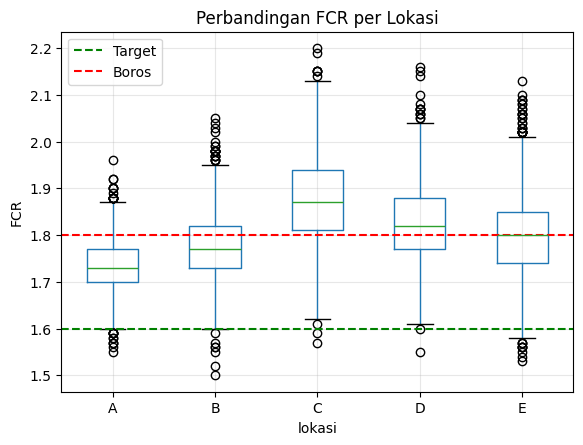

In [38]:
print("="*50)
print("RATA-RATA FCR PER LOKASI")
print("="*50)

fcr_per_lokasi = df.groupby('lokasi')['fcr'].mean().sort_values()

for lokasi in fcr_per_lokasi.index:
    print(f"Lokasi {lokasi}: {fcr_per_lokasi[lokasi]:.2f}")

lokasi_terbaik = fcr_per_lokasi.idxmin()
lokasi_terburuk = fcr_per_lokasi.idxmax()

print(f"\n Lokasi terbaik  : {lokasi_terbaik} (FCR {fcr_per_lokasi[lokasi_terbaik]:.2f})")
print(f" Lokasi terburuk : {lokasi_terburuk} (FCR {fcr_per_lokasi[lokasi_terburuk]:.2f})")
print(f" Selisih         : {fcr_per_lokasi[lokasi_terburuk] - fcr_per_lokasi[lokasi_terbaik]:.2f}")

plt.figure(figsize=(10, 6))
df.boxplot(column='fcr', by='lokasi')
plt.axhline(y=1.6, color='green', linestyle='--', label='Target')
plt.axhline(y=1.8, color='red', linestyle='--', label='Boros')
plt.title('Perbandingan FCR per Lokasi')
plt.suptitle('')  
plt.ylabel('FCR')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("\n" + "="*60)
print(" ANALISIS DATA ASLI ANDA")
print("="*60)

korelasi = {
    'Suhu': df['suhu_c'].corr(df['fcr']),
    'WQI': df['wqi'].corr(df['fcr']),
    'AQI': df['aqi'].corr(df['fcr'])
}

print("\n KORELASI DENGAN FCR:")
for faktor, nilai in korelasi.items():
    print(f"{faktor}: {nilai:.3f}")

faktor_terkuat = max(korelasi, key=lambda x: abs(korelasi[x]))
print(f"\n FAKTOR PALING BERPENGARUH: {faktor_terkuat} (r = {korelasi[faktor_terkuat]:.3f})")


 ANALISIS DATA ASLI ANDA

 KORELASI DENGAN FCR:
Suhu: 0.675
WQI: -0.078
AQI: 0.218

 FAKTOR PALING BERPENGARUH: Suhu (r = 0.675)


In [ ]:
print("\n" + "-"*60)
print(" HUBUNGAN SUHU DENGAN FCR")
print("-"*60)

suhu_normal = df[df['suhu_c'] <= 30]
suhu_tinggi = df[df['suhu_c'] > 30]

print(f"FCR saat suhu normal (≤30°C): {suhu_normal['fcr'].mean():.2f}")
print(f"FCR saat suhu tinggi (>30°C): {suhu_tinggi['fcr'].mean():.2f}")
print(f"Selisih: +{suhu_tinggi['fcr'].mean() - suhu_normal['fcr'].mean():.2f}")


------------------------------------------------------------
 HUBUNGAN SUHU DENGAN FCR
------------------------------------------------------------
FCR saat suhu normal (≤30°C): 1.76
FCR saat suhu tinggi (>30°C): 1.88
Selisih: +0.12


In [ ]:
print("\n" + "-"*60)
print(" HUBUNGAN KUALITAS AIR DENGAN FCR")
print("-"*60)

wqi_baik = df[df['wqi'] >= 70]
wqi_buruk = df[df['wqi'] < 70]

print(f"FCR saat WQI baik (≥70): {wqi_baik['fcr'].mean():.2f}")
print(f"FCR saat WQI buruk (<70): {wqi_buruk['fcr'].mean():.2f}")
print(f"Selisih: {wqi_buruk['fcr'].mean() - wqi_baik['fcr'].mean():.2f}")


------------------------------------------------------------
 HUBUNGAN KUALITAS AIR DENGAN FCR
------------------------------------------------------------
FCR saat WQI baik (≥70): 1.81
FCR saat WQI buruk (<70): 1.80
Selisih: -0.01


In [202]:
pakan_sebelum = df['total_pakan_kg'].sum()

df['total_pakan_kg'] = df['total_pakan_kg']

pakan_sesudah = df['total_pakan_kg'].sum()

print(f"Total pakan SEBELUM konversi: {pakan_sebelum:,.2f} ton")
print(f"Total pakan SETELAH konversi : {pakan_sesudah:,.2f} kg")
print(f" Selesai konversi *1000")

Total pakan SEBELUM konversi: 165,370,770.00 ton
Total pakan SETELAH konversi : 165,370,770.00 kg
 Selesai konversi *1000


In [203]:
df['bobot_total_kg'] = df['berat_rata_kg'] * df['populasi_akhir']
print(f"\n Bobot total per baris sudah dihitung")


 Bobot total per baris sudah dihitung


In [204]:
total_bobot = df['bobot_total_kg'].sum()
total_pakan = df['total_pakan_kg'].sum()
fcr_cek = total_pakan / total_bobot

print(f"Total Bobot: {total_bobot:,.0f} kg")
print(f"Total Pakan: {total_pakan:,.0f} kg")
print(f"FCR Hasil   : {fcr_cek:.2f}")

if 1.3 <= fcr_cek <= 2.5:
    print(" VALID! FCR masuk akal (1.3 - 2.5)")
else:
    print(" PERINGATAN: FCR tidak masuk akal!")

Total Bobot: 91,953,346 kg
Total Pakan: 165,370,770 kg
FCR Hasil   : 1.80
 VALID! FCR masuk akal (1.3 - 2.5)


In [205]:
print(f"Rata-rata FCR     : {fcr.mean():.2f}")
print(f"Median FCR        : {fcr.median():.2f}")
print(f"FCR Terendah      : {fcr.min():.2f} (paling efisien)")
print(f"FCR Tertinggi     : {fcr.max():.2f} (paling boros)")

Rata-rata FCR     : 1.80
Median FCR        : 1.80
FCR Terendah      : 1.50 (paling efisien)
FCR Tertinggi     : 2.20 (paling boros)


In [206]:
efisien = len(df[df['fcr'] < 1.6])
sedang = len(df[(df['fcr'] >= 1.6) & (df['fcr'] <= 1.8)])
boros = len(df[df['fcr'] > 1.8])
total = len(df)

print("\n KATEGORI PERFORMANCE:")
print(f" Efisien (<1.6)  : {efisien} ({efisien/total*100:.1f}%)")
print(f" Sedang (1.6-1.8): {sedang} ({sedang/total*100:.1f}%)")
print(f" Boros (>1.8)   : {boros} ({boros/total*100:.1f}%)")


 KATEGORI PERFORMANCE:
 Efisien (<1.6)  : 39 (0.4%)
 Sedang (1.6-1.8): 5343 (53.4%)
 Boros (>1.8)   : 4618 (46.2%)


In [207]:
print("\n" + "="*60)
print(" ANALISIS DAMPAK FINANSIAL")
print("="*60)

# Asumsi harga
harga_pakan = 5000  # Rp per kg
harga_ayam = 25000  # Rp per kg

total_bobot = df['bobot_total_kg'].sum()
total_pakan = df['total_pakan_kg'].sum()
fcr_aktual = total_pakan / total_bobot

print(f"\nDATA PRODUKSI (SETELAH KONVERSI):")
print(f"Total bobot dihasilkan: {total_bobot:,.0f} kg")
print(f"Total pakan terpakai  : {total_pakan:,.0f} kg")
print(f"FCR aktual            : {fcr_aktual:.2f}")
print(f"Target FCR ideal      : 1.60")

if fcr_aktual > 1.6:
    pakan_ideal = 1.6 * total_bobot
    pakan_terbuang = total_pakan - pakan_ideal
    kerugian = pakan_terbuang * harga_pakan
    
    print(f"\n KERUGIAN AKIBAT INEFISIENSI:")
    print(f"Pakan ideal (FCR 1.6): {pakan_ideal:,.0f} kg")
    print(f"Pakan terbuang       : {pakan_terbuang:,.0f} kg")
    print(f"KERUGIAN             : Rp {kerugian:,.0f}")
    
    
    print(f"\n SIMULASI PERBAIKAN:")
    for target in [1.7, 1.65, 1.6]:
        if target < fcr_aktual:
            hemat_pakan = (fcr_aktual - target) * total_bobot
            hemat_uang = hemat_pakan * harga_pakan
            print(f"\n   Jika FCR turun ke {target}:")
            print(f"      Hemat pakan: {hemat_pakan:,.0f} kg")
            print(f"      Hemat uang : Rp {hemat_uang:,.0f}")
else:
    print(f"\n EFISIENSI BAIK: FCR sudah di bawah target!")



 ANALISIS DAMPAK FINANSIAL

DATA PRODUKSI (SETELAH KONVERSI):
Total bobot dihasilkan: 91,953,346 kg
Total pakan terpakai  : 165,370,770 kg
FCR aktual            : 1.80
Target FCR ideal      : 1.60

 KERUGIAN AKIBAT INEFISIENSI:
Pakan ideal (FCR 1.6): 147,125,353 kg
Pakan terbuang       : 18,245,417 kg
KERUGIAN             : Rp 91,227,083,520

 SIMULASI PERBAIKAN:

   Jika FCR turun ke 1.7:
      Hemat pakan: 9,050,082 kg
      Hemat uang : Rp 45,250,410,615

   Jika FCR turun ke 1.65:
      Hemat pakan: 13,647,749 kg
      Hemat uang : Rp 68,238,747,068

   Jika FCR turun ke 1.6:
      Hemat pakan: 18,245,417 kg
      Hemat uang : Rp 91,227,083,520


In [208]:
print("\n" + "="*60)
print(" RINGKASAN EKSEKUTIF")
print("="*60)

print(f"""
 PERFORMANCE:
   • Rata-rata FCR: {fcr.mean():.2f} (target 1.60)
   • Kesenjangan: {fcr.mean() - 1.6:+.2f}
   • {efisien/total*100:.1f}% kandang efisien
   • {boros/total*100:.1f}% kandang boros

 LOKASI:
   • Terbaik: Lokasi {lokasi_terbaik} (FCR {fcr_per_lokasi[lokasi_terbaik]:.2f})
   • Terburuk: Lokasi {lokasi_terburuk} (FCR {fcr_per_lokasi[lokasi_terburuk]:.2f})

 FINANSIAL:
   • Total pakan terpakai: {total_pakan:,.0f} kg
   • Total bobot: {total_bobot:,.0f} kg
   • FCR aktual: {fcr_aktual:.2f}
""")

if fcr_aktual > 1.6:
    print(f"   • KERUGIAN: Rp {kerugian:,.0f}")

print("\n REKOMENDASI:")
print(f"   1. Fokus perbaiki Lokasi {lokasi_terburuk}")
print(f"   2. Tiru praktik terbaik dari Lokasi {lokasi_terbaik}")
print(f"   3. Target FCR 1.7 → hemat Rp {(fcr_aktual-1.7)*total_bobot*harga_pakan:,.0f}")
print("="*60)


 RINGKASAN EKSEKUTIF

 PERFORMANCE:
   • Rata-rata FCR: 1.80 (target 1.60)
   • Kesenjangan: +0.20
   • 0.4% kandang efisien
   • 46.2% kandang boros

 LOKASI:
   • Terbaik: Lokasi A (FCR 1.74)
   • Terburuk: Lokasi C (FCR 1.88)

 FINANSIAL:
   • Total pakan terpakai: 165,370,770 kg
   • Total bobot: 91,953,346 kg
   • FCR aktual: 1.80

   • KERUGIAN: Rp 91,227,083,520

 REKOMENDASI:
   1. Fokus perbaiki Lokasi C
   2. Tiru praktik terbaik dari Lokasi A
   3. Target FCR 1.7 → hemat Rp 45,250,410,615


In [209]:
df.to_csv('dataset_broiler_analisis_final.csv', index=False)
print("\n File tersimpan: 'dataset_broiler_analisis_final.csv'")
print(" Analisis selesai!")


 File tersimpan: 'dataset_broiler_analisis_final.csv'
 Analisis selesai!
